In [83]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Ex. 4. Rough tests and estimation of heavy-tailed features: plot of the mean excess function.

<h3>Having the empirical or generated data $X^n = \{X_1, ..., X_n\}$ calculate the empirical mean excess function by formula
$$e_n(u) = \sum_{i=1}^n{(X_i-u)}1\{X_i>u\}/\sum_{i=1}^n{1\{X_i>u\}}$$
Investigate the behavior of $e_n(u)$ for the large $u$. For heavy-tailed distributions the function $e_n(u)$ tends to infinity. A linear plot $u \rightarrow e(u)$ corresponds to a Pareto distribution, the constant $1 / \lambda$ corresponds to an exponential distribution and $e(u)$ tends to 0 for light-tailed distributions.

In [84]:
def meanexcessfunc(X, u):
    res = np.zeros(u.size)
    for i in range(0, u.size):
        sum = 0
        number = 0
        for x in X:
            if (x > u[i]):
                sum += x - u[i]
                number += 1
        if (number != 0):
            res[i] = (sum/number)
    return res

In [90]:
S = 10000
lognorm = np.random.lognormal(mean = 5, sigma = 10, size = S)
pareto = np.random.pareto(a = 1, size = S)
expon_10 = np.random.exponential(scale = 10, size = S)
expon_5 = np.random.exponential(scale = 5, size = S)
norm = np.random.normal(size = S)
u = np.linspace(0, 40, 10000)

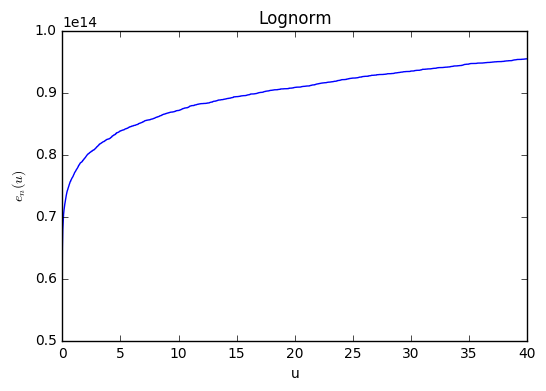

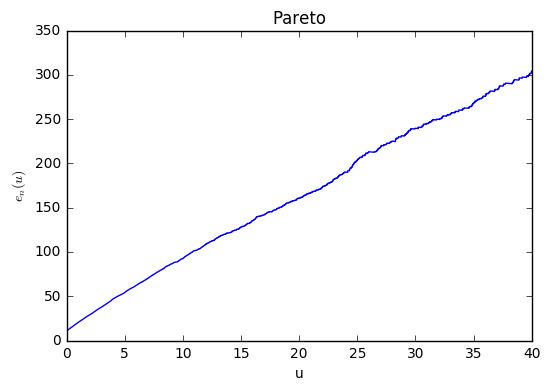

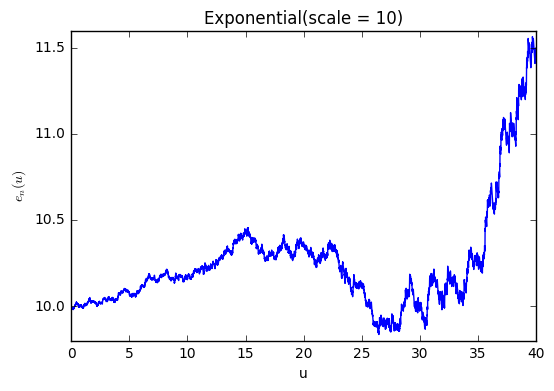

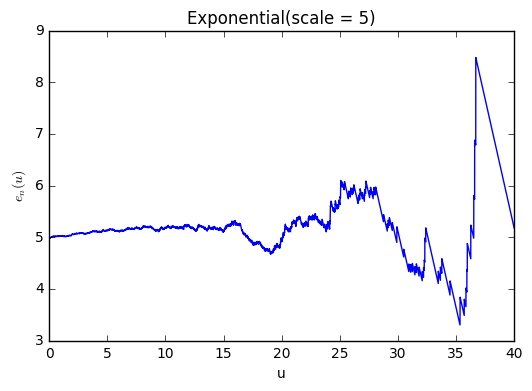

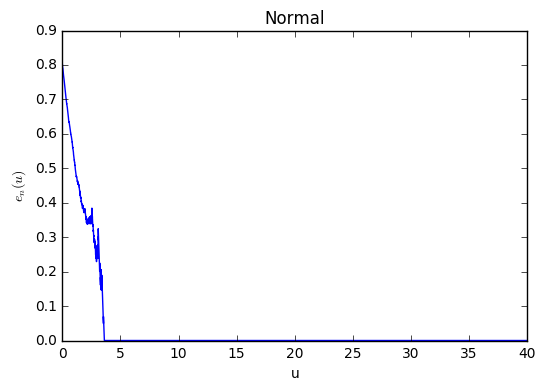

In [91]:
#meanexcessfunc(cauchy, u)
plt.figure()
plt.plot(u, meanexcessfunc(lognorm,u))
plt.xlabel('u')
plt.ylabel('$e_n(u)$')
plt.title('Lognorm')
plt.show()
plt.figure()
plt.plot(u, meanexcessfunc(pareto,u))
plt.xlabel('u')
plt.ylabel('$e_n(u)$')
plt.title('Pareto')
plt.show()
plt.figure()
plt.plot(u, meanexcessfunc(expon_10,u))
plt.xlabel('u')
plt.ylabel('$e_n(u)$')
plt.title('Exponential(scale = 10)')
plt.show()
plt.figure()
plt.plot(u, meanexcessfunc(expon_5,u))
plt.xlabel('u')
plt.ylabel('$e_n(u)$')
plt.title('Exponential(scale = 5)')
plt.show()
plt.figure()
plt.plot(u, meanexcessfunc(norm,u))
plt.xlabel('u')
plt.ylabel('$e_n(u)$')
plt.title('Normal')
plt.show()

<h3>We see, that, generally, all facts from the task above are true:
* Heavy-tailed lognorm goes very fast to huge $10^{14}$ numbers
* Pareto is pretty much linear
* Exponential mostly dances around it's $1 / \lambda$ (scale) value
* Light-tailed normal distribution quickly comes to 0